# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ycwang15/PGP_DSBA/Data/used_device_data.csv"
)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

In [6]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Observation
##### We can know that the dataset has 3454 rows and 15 columns, no duplicate rows, but there are 179 missing values in main_camera_mp column; 2 missing values in selfie_camera_mp column, 4 missing values in int_meory and ram columns, 6 in battery, 7 in weight.

##### From my point of view, the data type of each column is correct.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

<AxesSubplot:xlabel='normalized_used_price', ylabel='Count'>

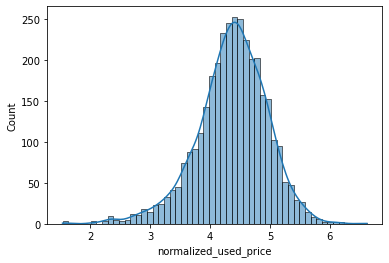

<IPython.core.display.Javascript object>

In [8]:
# 1
sns.histplot(data=df, x="normalized_used_price", kde=True)

<AxesSubplot:xlabel='normalized_used_price'>

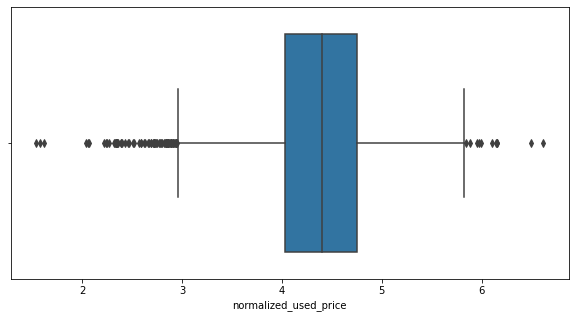

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="normalized_used_price")

#### We can assume that the distribution of normalized used price is normal distribution, although there are some outliers.

<AxesSubplot:xlabel='screen_size', ylabel='Count'>

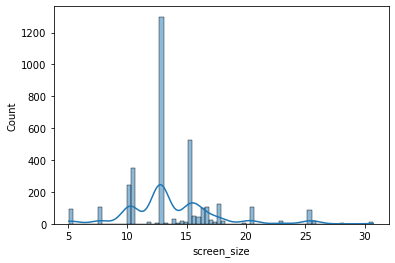

<IPython.core.display.Javascript object>

In [10]:
sns.histplot(data=df, x="screen_size", kde=True)

<AxesSubplot:xlabel='screen_size'>

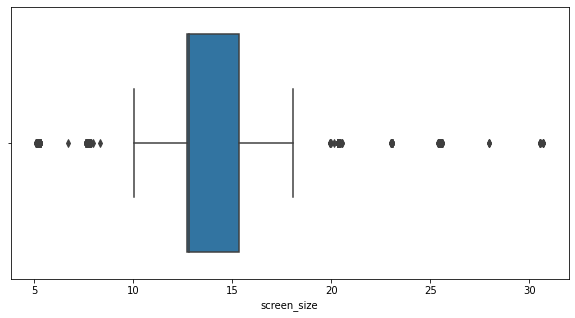

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="screen_size")

#### Most screen size are around 10 - 20

<AxesSubplot:xlabel='battery', ylabel='Count'>

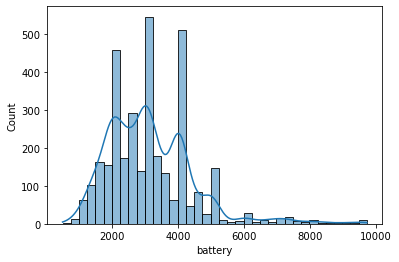

<IPython.core.display.Javascript object>

In [12]:
sns.histplot(data=df, x="battery", kde=True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

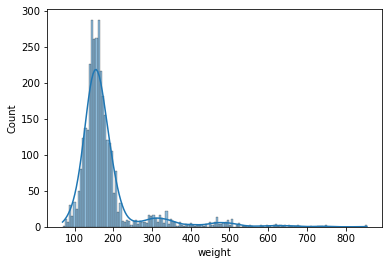

<IPython.core.display.Javascript object>

In [13]:
sns.histplot(data=df, x="weight", kde=True)

<AxesSubplot:xlabel='weight'>

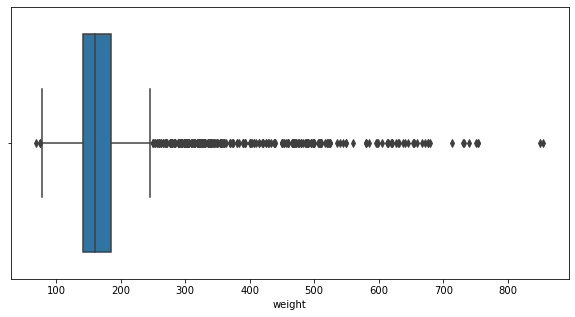

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="weight")

#### There are so many outliers of "weight", but it's good to leave it in the dataset, because they are real data.

<AxesSubplot:xlabel='release_year', ylabel='count'>

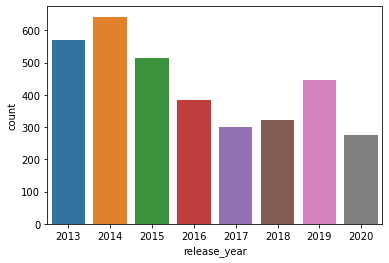

<IPython.core.display.Javascript object>

In [15]:
sns.countplot(data=df, x="release_year")

In [16]:
df["brand_name"].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'),
  Text(33, 0, 'XOLO')])

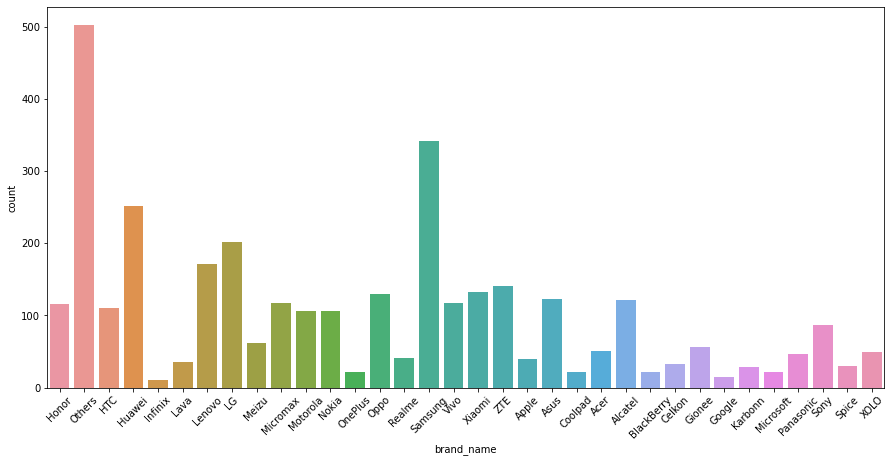

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x="brand_name")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'iOS'),
  Text(3, 0, 'Windows')])

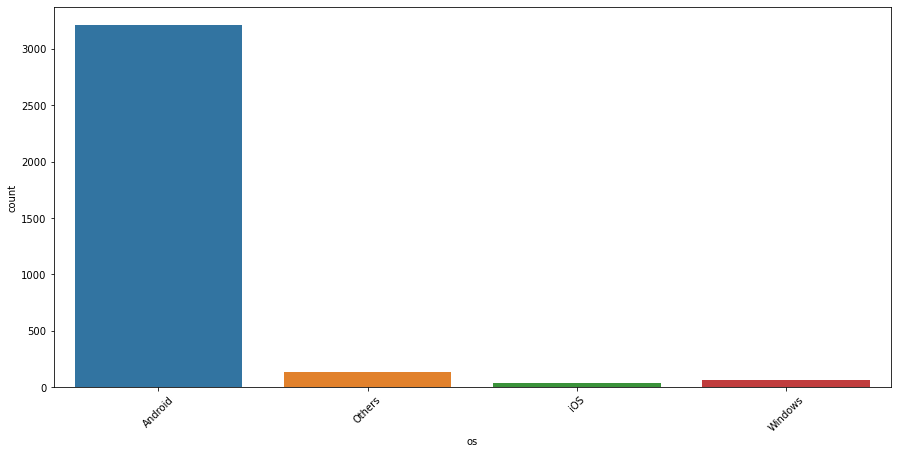

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x="os")
plt.xticks(rotation=45)

#### We can notice that there are a lot of different brands in dataset, and most of phone are Android system.

In [19]:
df["4g"].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
df["5g"].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
df_not_4g_or_5g = df[(df["4g"] == "no") & (df["5g"] == "no")].shape[0]
df_not_4g_or_5g

1119

<IPython.core.display.Javascript object>

In [22]:
df_4g = df[(df["4g"] == "yes") & (df["5g"] == "no")].shape[0]
df_4g

2183

<IPython.core.display.Javascript object>

In [23]:
df_5g = df[(df["4g"] == "yes") & (df["5g"] == "yes")].shape[0]
df_5g

152

<IPython.core.display.Javascript object>

In [24]:
df_not_4g_or_5g + df_4g + df_5g == df.shape[0]

True

<IPython.core.display.Javascript object>

#### Most phones are 4g(2183), only 152 of them are 5g, and still have 1119 3g or 2g phones.

In [25]:
# 2
Android = df[df["os"] == "Android"]
percentage = Android.shape[0] / df.shape[0]
print("The percentage of Android device is nearly", round(percentage * 100, 2), "%.")

The percentage of Android device is nearly 93.05 %.


<IPython.core.display.Javascript object>

#### The percentage of Android device is nearly 93.05%.

<AxesSubplot:xlabel='ram', ylabel='os'>

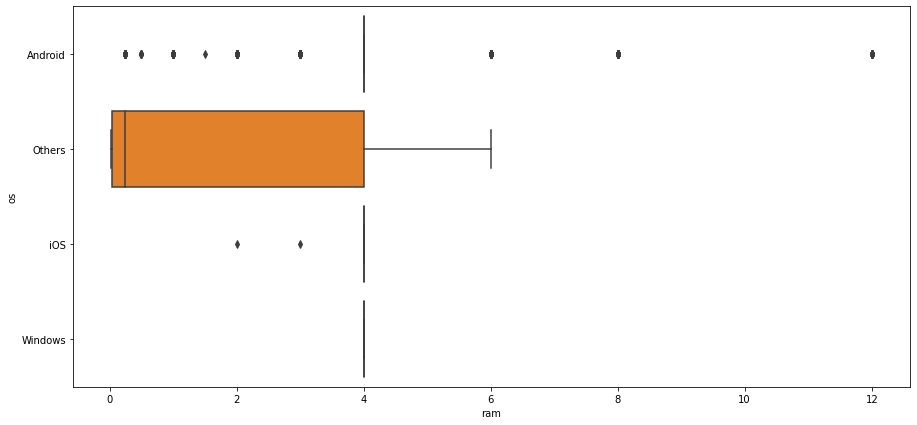

<IPython.core.display.Javascript object>

In [26]:
# 3
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x="ram", y="os")

#### We can notice that most of ram is 4, some outliers, but very little.

<AxesSubplot:xlabel='battery', ylabel='weight'>

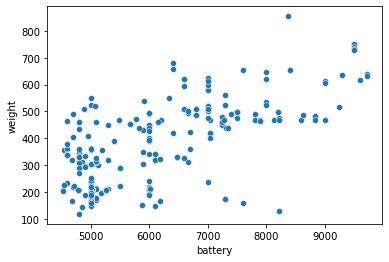

<IPython.core.display.Javascript object>

In [27]:
# 4
battery = df[df["battery"] > 4500]
sns.scatterplot(data=battery, x="battery", y="weight")

#### As the increase of battery size, the weight increase as well.

In [28]:
# 5
size = df[df["screen_size"] > 6]
size.groupby(by=["os"])["brand_name"].value_counts(ascending=False)

os       brand_name
Android  Others        464
         Samsung       322
         Huawei        249
         LG            195
         Lenovo        171
         ZTE           139
         Xiaomi        132
         Oppo          129
         Asus          122
         Vivo          117
         Honor         116
         Alcatel       109
         HTC           107
         Micromax      106
         Motorola      106
         Sony           86
         Meizu          62
         Gionee         56
         Acer           48
         Panasonic      47
         XOLO           47
         Nokia          46
         Realme         41
         Lava           35
         Spice          30
         Karbonn        29
         Celkon         22
         Coolpad        22
         OnePlus        22
         Google         15
         BlackBerry     10
         Infinix        10
Others   BlackBerry     11
         Samsung         9
         Alcatel         6
         Others          6
        

<IPython.core.display.Javascript object>

#### Here we can see that how many phones for different brands in this dataset, we can noticed that there are a lot of different brands, and these brands will be treated as dummy variables in the future.

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='brand_name'>

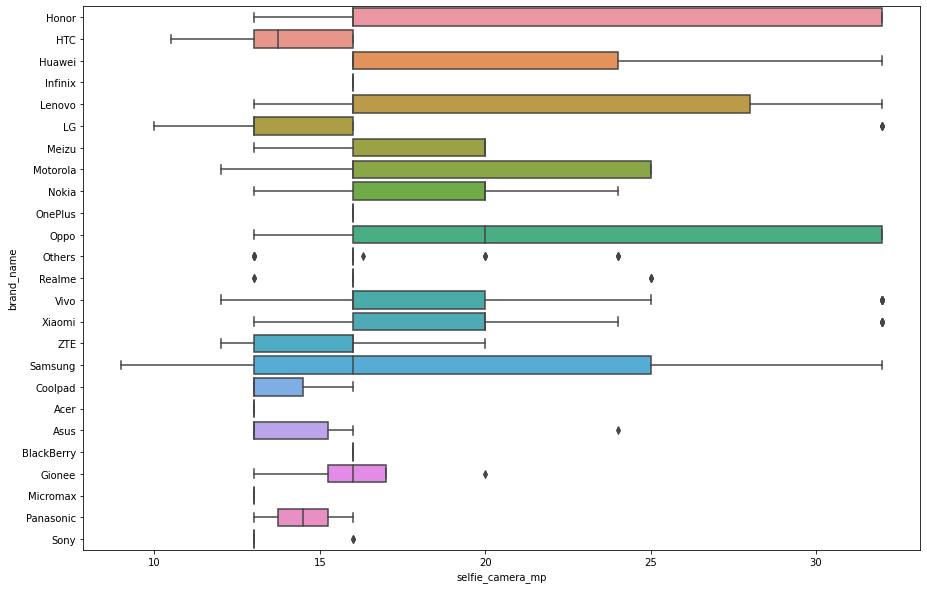

<IPython.core.display.Javascript object>

In [29]:
# 6
plt.figure(figsize=(15, 10))
self_camera = df[df["selfie_camera_mp"] > 8]
sns.boxplot(data=self_camera, x="selfie_camera_mp", y="brand_name")

#### So, here is the distribution of selfie camera mp(> 8mp) across the different brands, varies greatly from brand to brand.

<AxesSubplot:>

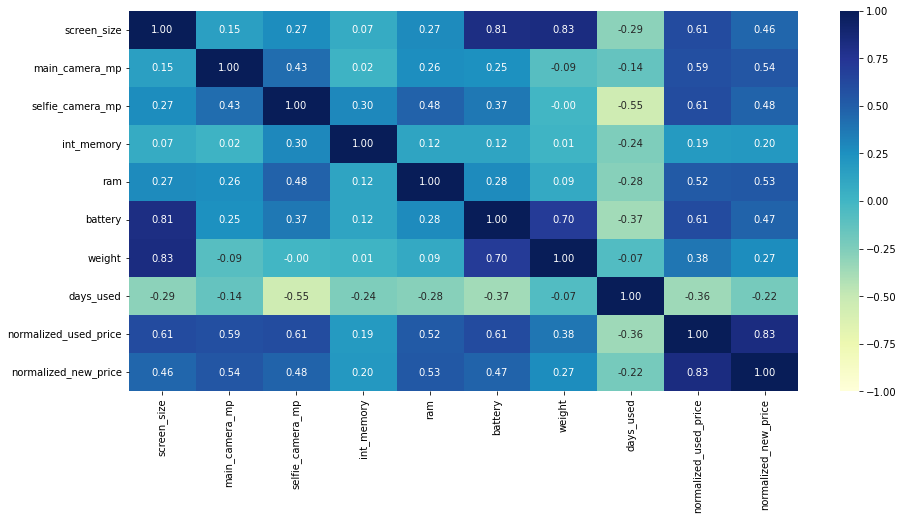

<IPython.core.display.Javascript object>

In [30]:
# 7
col = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
col_new = col.remove("release_year")
plt.figure(figsize=(15, 7))
sns.heatmap(df[col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu")

#### normalized new price; screen size; main camera mp; battery; normalized new price are highly correlated to normalized used price.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [31]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

#### There are many missing values in the dataset.

In [32]:
# impute the missing values
# Use the median to impute missing values for mobile phones with different brand names

# main_camera_mp
df["main_camera_mp"] = df["main_camera_mp"].fillna(
    value=df.groupby(["brand_name"])["main_camera_mp"].transform("median")
)

# selfie_camera_mp
df["selfie_camera_mp"] = df["selfie_camera_mp"].fillna(
    value=df.groupby(["brand_name"])["selfie_camera_mp"].transform("median")
)

# int_memory
df["int_memory"] = df["int_memory"].fillna(
    value=df.groupby(["brand_name"])["int_memory"].transform("median")
)

# ram
df["ram"] = df["ram"].fillna(
    value=df.groupby(["brand_name"])["ram"].transform("median")
)

# battery
df["battery"] = df["battery"].fillna(
    value=df.groupby(["brand_name"])["battery"].transform("median")
)

# weight
df["weight"] = df["weight"].fillna(
    value=df.groupby(["brand_name"])["weight"].transform("median")
)

<IPython.core.display.Javascript object>

In [33]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

In [34]:
# Use the overall median of the main_camera_mp column to impute the missing values that still exist
df["main_camera_mp"] = df["main_camera_mp"].fillna(value=df["main_camera_mp"].median())

<IPython.core.display.Javascript object>

In [35]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

#### Now there's no missing values.

### Feature Engineering

In [36]:
# look at the data
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [37]:
# Add a new column named "release year to date" to calculate the year since the phone was released to now
df["release_year_to_date"] = 2022 - df["release_year"]
df.drop("release_year", axis=1, inplace=True)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,release_year_to_date
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,2
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,2
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,2
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,2
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,2


<IPython.core.display.Javascript object>

### Outlier detection and treatment

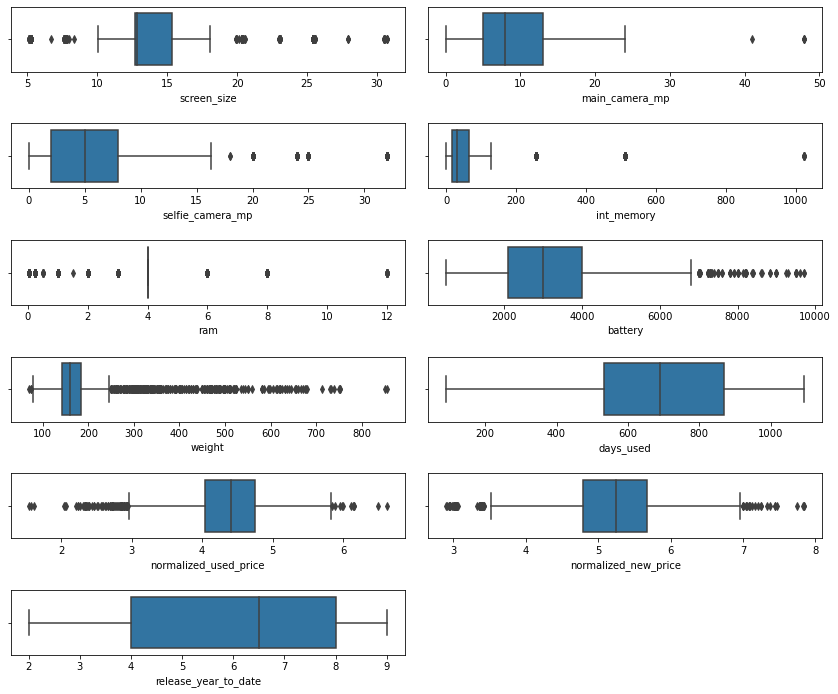

<IPython.core.display.Javascript object>

In [38]:
columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
    "days_used",
    "normalized_used_price",
    "normalized_new_price",
    "release_year_to_date",
]
plt.figure(figsize = (12,10))
for i, variable in enumerate(columns):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)



#### Although there are lots of outliers, we don't do anything on them, because they are the real data.

### EDA

- It is a good idea to explore the data once again after manipulating it.

In [39]:
df["brand_name"].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
df["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

<IPython.core.display.Javascript object>

#### I believe we do not need to visualize data again, we just imput some missing value, and it may not much influence the distribution of certain attributes.
#### But as mentioned before, so many brand names need to be treated.

## Model Building - Linear Regression

#### Before build the model, I combine different brand names into a large group, based on the country they belong to (search on the website, take a look at the background of each brand), in order to decrease the number of dummy variables, this is definitely a reasonable operation.

In [41]:
# Combine different groups in brand_name column to a large group,
# in order to decrease the number of dummy variables.
# Merge different brands based on the country they belong to.
map_replace = {
    "Huawei": "China_brand",
    "Xiaomi": "China_brand",
    "Lenovo": "China_brand",
    "Oppo": "China_brand",
    "Infinix": "China_brand",
    "ZTE": "China_brand",
    "Asus": "China_brand",
    "Vivo": "China_brand",
    "Honor": "China_brand",
    "HTC": "China_brand",
    "Meizu": "China_brand",
    "Gionee": "China_brand",
    "Acer": "China_brand",
    "Realme": "China_brand",
    "Coolpad": "China_brand",
    "OnePlus": "China_brand",
    "Samsung": "Korea_brand",
    "LG": "Korea_brand",
    "Alcatel": "European_brands",
    "Nokia": "European_brands",
    "Micromax": "India_brand",
    "XOLO": "India_brand",
    "Lava": "India_brand",
    "Celkon": "India_brand",
    "Spice": "India_brand",
    "Karbonn": "India_brand",
    "Sony": "Japan_brand",
    "Panasonic": "Japan_brand",
    "Motorola": "America_brand",
    "Microsoft": "America_brand",
    "BlackBerry": "America_brand",
    "Google": "America_brand",
    "Apple": "America_brand",
    "Others": "Others",
}
df["brand_name"] = df["brand_name"].map(map_replace)

<IPython.core.display.Javascript object>

In [42]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,release_year_to_date
0,China_brand,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,2
1,China_brand,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,2
2,China_brand,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,2
3,China_brand,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,2
4,China_brand,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,2


<IPython.core.display.Javascript object>

In [43]:
df["brand_name"].value_counts()

China_brand        1552
Korea_brand         542
Others              502
India_brand         294
European_brands     227
America_brand       204
Japan_brand         133
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

#### Here, we can see that most of smart phones come from Asia, China first, Korea second, India third.

In [44]:
# Create dummy variables
df = pd.get_dummies(df, columns=["brand_name", "os", "4g", "5g"], drop_first=True)
df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,...,brand_name_European_brands,brand_name_India_brand,brand_name_Japan_brand,brand_name_Korea_brand,brand_name_Others,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [45]:
X = df.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df[["normalized_used_price"]]

<IPython.core.display.Javascript object>

In [46]:
X = sm.add_constant(X)

/Users/yuchenwang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [48]:
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  \
3026   1800.0   120.0        819              4.796204  ...   
1525   4050.0   225.0        585              5.434595  ...   
1128   2550.0   162.0        727              5.137914  ...   
3003   3200.0   126.0        800              5.189228  ...   
2907   2900.0   160.0        560              5.016220  ...   

      brand_name_European_brands  brand_name_India_brand  \
3026                           0                       1   
1525                      

<IPython.core.display.Javascript object>

In [49]:
print(X_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  weight  days_used  normalized_new_price  ...  \
866    3000.0   206.0        632              5.190788  ...   
957    1400.0   140.0        637              3.884652  ...   
280    5000.0   185.0        329              4.487287  ...   
2150   3200.0   148.0        648              5.639422  ...   
93     3500.0   179.0        216              5.300415  ...   

      brand_name_European_brands  brand_name_India_brand  \
866                            0                       0   
957                 

<IPython.core.display.Javascript object>

In [50]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

<IPython.core.display.Javascript object>

In [51]:
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     610.3
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           19:13:06   Log-Likelihood:                 105.79
No. Observations:                   2417   AIC:                            -167.6
Df Residuals:                       2395   BIC:                            -40.20
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### R^2 is 0.843, adj. R^2 is 0.841, both of them are good.

### Model Performance Check

In [52]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [53]:
# Checking train set profermance
print("Training Performance\n")
olsres_train_perf = model_performance_regression(olsres, X_train, y_train)
olsres_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231608,0.181331,0.84255,0.841103,NaN


<IPython.core.display.Javascript object>

In [54]:
# Checking test set profermance
print("Test Performance\n")
olsres_test_perf = model_performance_regression(olsres, X_test, y_test)
olsres_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236831,0.183568,0.844491,0.841117,NaN


<IPython.core.display.Javascript object>

#### RMSE and MAE are pretty low, and R^2 and adj.R^2 are highly enough, training and test performance are matched, 
#### MAPE is : (actual - predicted)/ actual, here, MAPE is NaN, probably because actual is zero. Just ignore this situation.

### TEST FOR MULTICOLLINEARITY

In [55]:
###### Check the VIF of the predictors


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [56]:
VIF = checking_vif(X_train)
VIF

,feature,VIF
0,const,158.833698
1,screen_size,7.372374
2,main_camera_mp,2.159846
3,selfie_camera_mp,2.639787
4,int_memory,1.284192
5,ram,2.135495
6,battery,3.921589
7,weight,6.260192
8,days_used,2.588787
9,normalized_new_price,2.840731


<IPython.core.display.Javascript object>

### Removing Multicollinearity

In [57]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """

    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:

        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [58]:
list_greater_than_5 = VIF[VIF["VIF"] > 5].values.tolist()

list_greater_than_5

[['const', 158.83369775731856],
 ['screen_size', 7.372374230388162],
 ['weight', 6.260191850226915],
 ['brand_name_China_brand', 6.065060172884965]]

<IPython.core.display.Javascript object>

In [59]:
col_list = ["screen_size", "weight", "brand_name_China_brand"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_China_brand,0.841154,0.232681
1,screen_size,0.837716,0.235185
2,weight,0.837677,0.235214


<IPython.core.display.Javascript object>

In [60]:
col_to_drop = "brand_name_China_brand"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_China_brand


,feature,VIF
0,const,142.651170
1,screen_size,7.360439
2,main_camera_mp,2.145184
3,selfie_camera_mp,2.616944
4,int_memory,1.284089
5,ram,2.134702
6,battery,3.919930
7,weight,6.244232
8,days_used,2.579981
9,normalized_new_price,2.840724


<IPython.core.display.Javascript object>

In [61]:
list_greater_than_5_2 = vif[vif["VIF"] > 5].values.tolist()

list_greater_than_5_2

[['const', 142.65117025398],
 ['screen_size', 7.360438737132735],
 ['weight', 6.244231588170293]]

<IPython.core.display.Javascript object>

In [62]:
col_list2 = ["screen_size", "weight"]

res2 = treating_multicollinearity(X_train2, y_train, col_list2)
res2

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837709,0.235191
1,screen_size,0.837653,0.235231


<IPython.core.display.Javascript object>

In [63]:
col_to_drop2 = "weight"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop2)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop2)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop2)
vif

VIF after dropping  weight


,feature,VIF
0,const,123.850658
1,screen_size,3.420280
2,main_camera_mp,2.055591
3,selfie_camera_mp,2.587798
4,int_memory,1.283934
5,ram,2.131117
6,battery,3.533957
7,days_used,2.567475
8,normalized_new_price,2.837016
9,release_year_to_date,4.529760


<IPython.core.display.Javascript object>

In [64]:
list_greater_than_5_3 = vif[vif["VIF"] > 5].values.tolist()

list_greater_than_5_3

[['const', 123.85065838792475]]

<IPython.core.display.Javascript object>

#### Now, we dropped all Multicollinearity variables, and build the model again.

In [65]:
olsmodel = sm.OLS(y_train, X_train3)
olsresult = olsmodel.fit()

<IPython.core.display.Javascript object>

In [66]:
print(olsresult.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     657.4
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           19:13:13   Log-Likelihood:                 78.731
No. Observations:                   2417   AIC:                            -117.5
Df Residuals:                       2397   BIC:                            -1.657
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### When we build the model in the second time, we can notice that the R^2 and adj.R^2 are still highly enough, represently 0.839 and 0.838.

### Dropping high p-value variables

In [67]:
cols = X_train3.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = X_train3[cols]

    model = sm.OLS(y_train, x_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'release_year_to_date', 'brand_name_Korea_brand', '4g_yes']


<IPython.core.display.Javascript object>

#### Now, we want to drop all variables that have a high p_value. And bulid the model one more time.

In [68]:
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

<IPython.core.display.Javascript object>

In [69]:
olsmod2 = sm.OLS(y_train, X_train4).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1386.
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           19:13:16   Log-Likelihood:                 73.558
No. Observations:                   2417   AIC:                            -127.1
Df Residuals:                       2407   BIC:                            -69.21
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234718,0.183942,0.838294,0.837622,NaN


<IPython.core.display.Javascript object>

In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238936,0.184572,0.841715,0.840172,NaN


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### TEST FOR LINEARITY AND INDEPENDENCE

In [72]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867848,0.219640
1525,4.448399,4.577281,-0.128881
1128,4.315353,4.284765,0.030588
3003,4.282068,4.266685,0.015383
2907,4.456438,4.452813,0.003625


<IPython.core.display.Javascript object>

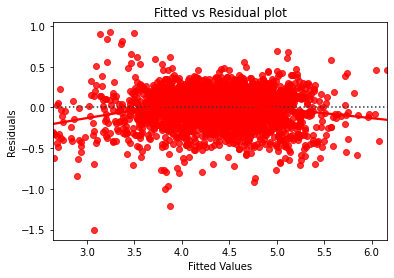

<IPython.core.display.Javascript object>

In [73]:
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="red", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### There's no certain pattern of Fitted vs residual plot, so the model meets the requirements of LINEARITY AND INDEPENDENCE.

### TEST FOR NORMALITY

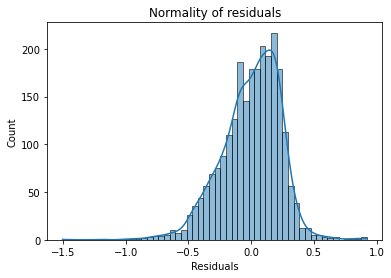

<IPython.core.display.Javascript object>

In [74]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

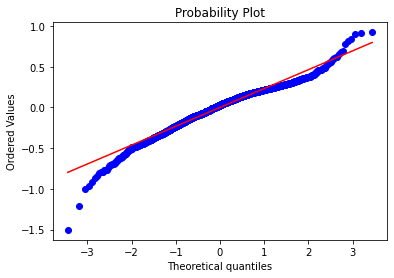

<IPython.core.display.Javascript object>

In [75]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [76]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9715383052825928, pvalue=1.6337974262206947e-21)

<IPython.core.display.Javascript object>

##### Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
##### Strictly speaking, the residuals are not normal.
##### However, as an approximation, we can accept this distribution as close to being normal.
##### So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

In [77]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.0592017882893667), ('p-value', 0.15979222132512402)]

<IPython.core.display.Javascript object>

##### Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Predictions on the test data

In [78]:
pred = olsmod2.predict(X_test4)

<IPython.core.display.Javascript object>

In [79]:
y_test_final = y_test.squeeze()

<IPython.core.display.Javascript object>

In [80]:
df_pred_test = pd.DataFrame({"Actual": y_test_final, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.380515
2341,3.696103,3.963930
1913,3.592093,3.770227
688,4.306495,4.112518
650,4.522115,5.133951
2291,4.259294,4.403737
40,4.997685,5.416421
1884,3.875359,4.114028
2538,4.206631,4.024427
45,5.380450,5.314521


<IPython.core.display.Javascript object>

## Final Model

In [81]:
X_train_final = X_train4.copy()
X_test_final = X_test4.copy()

<IPython.core.display.Javascript object>

In [82]:
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1386.
Date:                   Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                           19:13:28   Log-Likelihood:                 73.558
No. Observations:                   2417   AIC:                            -127.1
Df Residuals:                       2407   BIC:                            -69.21
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

In [83]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, X_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234718,0.183942,0.838294,0.837622,NaN


<IPython.core.display.Javascript object>

In [84]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, X_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238936,0.184572,0.841715,0.840172,NaN


<IPython.core.display.Javascript object>

In [85]:
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_test_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(X_test_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            X_test_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", X_test_final.columns[i], ")")

normalized_used_price = 1.2508497807216197 + 0.043166435923519264 * ( screen_size ) +  0.01827543136456252 * ( main_camera_mp ) +  0.013086412947413431 * ( selfie_camera_mp ) +  0.01585300952735446 * ( ram ) +  6.30281714875548e-05 * ( days_used ) +  0.4294970591027568 * ( normalized_new_price ) +  -0.019037663940738983 * ( release_year_to_date ) +  -0.03193002659721723 * ( brand_name_Korea_brand ) +  0.04104508537306914 * ( 4g_yes )


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations 

- The model is able to explain ~84% of the variation in the data.
- This indicates that the model is good for prediction as well as inference purposes
- If the screen size increases by one unit, then its rating increases by 0.0432 units, all other variables held constant
- If the main_camera_mp increases by one unit, then its rating increases by 0.0183 units, all other variables held constant
- If the selfie_camera_mp increases by one unit, then its rating increases by 0.0131 units, all other variables held constant
- If the ram increases by one unit, then its rating increases by 0.0159 units, all other variables held constant
- If the normalized_new_price increases by one unit, then its rating increases by 0.4295 units, all other variables held constant
- If the release_year_to_date increases by one unit, then its rating decreases by 0.019 units, all other variables held constant
- The Korean brand will be 0.0319 units less than other brand.
- The 4g will be 0.0410 units greater than 5g or not 4g or 5g.
- If the company wants to increase the normalized used price, it should focus on 4G mobile phones. Mobile phones with large RAM and large screen size are more likely to obtain high prices.

___